In [11]:
import numpy as np
import matplotlib.pyplot as plt
import ewtpy
from dsp import sine_wave

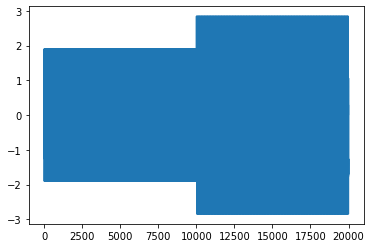

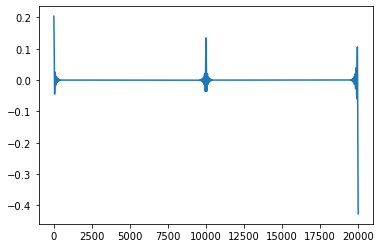

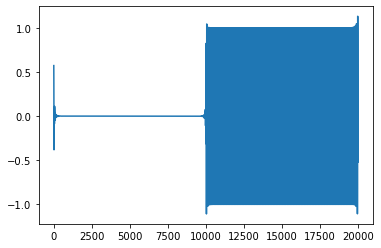

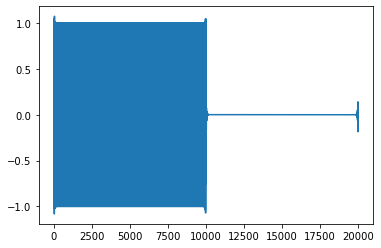

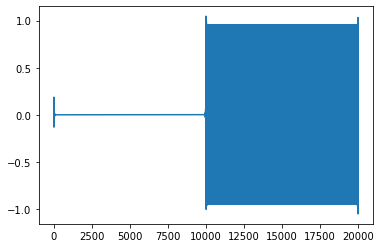

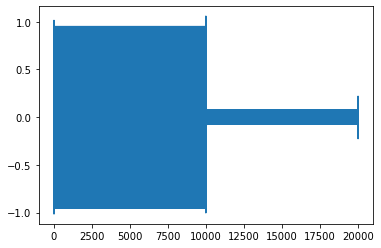

array([ 12.6  ,  37.6  ,  75.05 , 150.075, 225.05 ])

In [56]:
def ewt(signal, N):
    # ewt_res, mfb ,boundaries = ewtpy.EWT1D(signal, N = N, detect='locmaxmin', reg = 'average', lengthFilter = 20,sigmaFilter = 5)
    ewt_res, mfb ,boundaries = ewtpy.EWT1D(signal, N = N, detect='locmax', reg = 'average', lengthFilter = 50,sigmaFilter = 5, completion=1)
    return ewt_res, mfb ,boundaries


# x1 = sin(2*pi*50*t) + sin(2*pi*200*t);
# x2 = sin(2*pi*25*t) + sin(2*pi*100*t) + sin(2*pi*250*t);
Fs = 1000
t = np.linspace(0, 4, 4000, endpoint=False)

x1 = sine_wave(sampling_rate=Fs, frequency=50) + sine_wave(sampling_rate=Fs,frequency=200)
x2 = sine_wave(sampling_rate=Fs, frequency=25) + sine_wave(sampling_rate=Fs, frequency=100) + sine_wave(sampling_rate=Fs, frequency=250)

x = np.concatenate([x1, x2])


plt.plot(x)
plt.show()

ewt_res, mfb ,boundaries = ewt(x, N=6)
plt.plot(ewt_res[:, 0])
plt.show()
plt.plot(ewt_res[:, 1])
plt.show()
plt.plot(ewt_res[:, 2])
plt.show()
plt.plot(ewt_res[:, 3])
plt.show()
plt.plot(ewt_res[:, 4])
plt.show()

boundaries / np.pi * 500


# 相比于matlab,会多分解出一个低频的分量

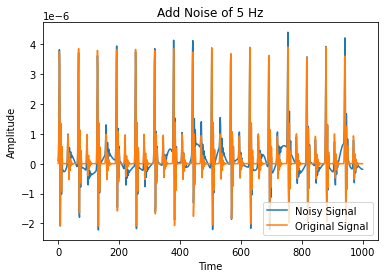

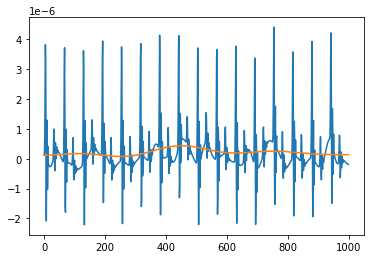

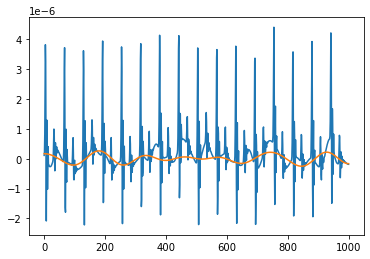

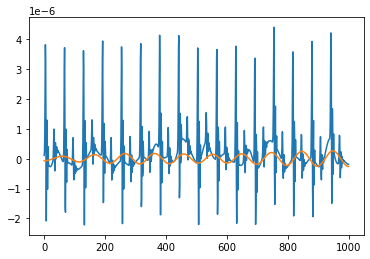

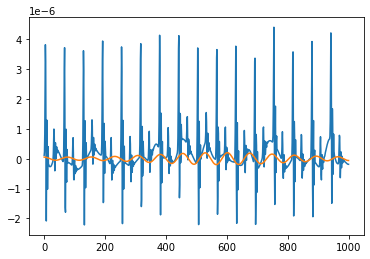

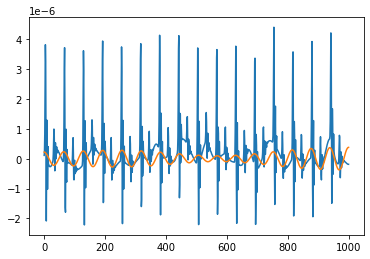

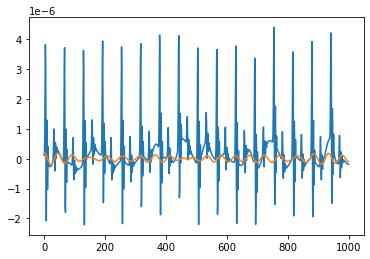

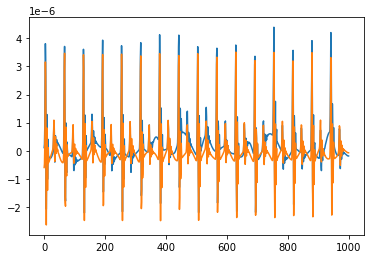

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([0.02199115, 0.05340708, 0.07539822, 0.09110619, 0.10995574,
        0.15079645]))

In [70]:
from dsp import load_demo, add_distort_noise
signal, _, _, _= load_demo()

signal_with_3Hz_Noise = add_distort_noise(signal, n_samples=1000, sampling_rate=100,noise_frequency=5,  noise_amplitude=0.4, show=True)


ewt_res, mfb ,boundaries = ewtpy.EWT1D(signal_with_3Hz_Noise, N = 7)
# plt.plot(ewt_res[:, 0])
# plt.show()
# plt.plot(ewt_res[:, 1])
# plt.show()
# plt.plot(ewt_res[:, 2])
# plt.show()
# plt.plot(ewt_res[:, 3])
# plt.show()
for res in ewt_res.T:
    plt.plot(signal_with_3Hz_Noise)
    plt.plot(res)

    plt.show()
mfb, boundaries